Network security is becoming increasingly important because of the massive expansion of computer networks' usage and the number of applications built on top of them, while all systems experience security flaws that could lead to an increase in attacks that could have a negative impact on the economy. Therefore, detecting vulnerabilities in the system in the network has become more important and needs to be done as accurately as possible in real-time.

Here are the goals of this exploration:

* 1-Gaining a basic understanding of the data set
* 2- Exploratory Data Analysis (EDA). 
* 3-Being able to classify if the packets are attack or normal
* 4- Walk through some fundamental concepts of building machine learning models


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
#Turn off the warnings.
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [44]:
# Combine the datasets
df = pd.concat([df_train, df_test], ignore_index=True)

# Verify the result
df

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
148513,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
148514,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15
148515,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [47]:
# add the column labels
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

In [48]:
df.columns = columns

In [49]:
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


## Understanding our data:

* information and visualization

In [50]:
print(F'Shape Train Data :',df.shape)

Shape Train Data : (148517, 43)


In [51]:
#Data Description

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  int64  
 1   protocol_type                148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  int64  
 5   dst_bytes                    148517 non-null  int64  
 6   land                         148517 non-null  int64  
 7   wrong_fragment               148517 non-null  int64  
 8   urgent                       148517 non-null  int64  
 9   hot                          148517 non-null  int64  
 10  num_failed_logins            148517 non-null  int64  
 11  logged_in                    148517 non-null  int64  
 12  num_compromised              148517 non-null  int64  
 13 

## We see the in Train Data
* 1- dtypes: float64(15)
* 2- int64(24)
* 3- object(4)
* 4- memory usage: 41.3+ MB

## We chick if we have miss  valuse
* 1- Ture Miss Valuse
* 2- False do not have Miss Valuse

In [52]:
df.isna()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
148513,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
148514,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
148515,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [54]:
# The total missing values in the Data Train ?
print('Number of Missing Values :' , df.isna().sum().sum())
print('We do not have Miss Values in the Data ')

Number of Missing Values : 0
We do not have Miss Values in the Data 


In [55]:
# We see the all columns and Teste
print('All columns Data ',df.columns)

All columns Data  Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'level'],
      dtype='object')



## What is the Features of network:
    
* 1-duration: time duration of the connection (quant.)
* 2-protocol type: protocol used in connection (cat., 3 categories)
* 3-service: destination network service used (cat., 70 categories)
* 4-flag: status of the connection (e.g. REJ = connection rejected) (cat., 11 categories)
* 5-src bytes: number of data bytes transferred from source to destination (quant.)
* 6-dst bytes: number of data bytes transferred from destination to source (quant.)
* 7-land: indicator whether port number and IP address of source and destination are equal, if yes = 1, otherwise 0 (binary)
* 8-wrong fragment: number of wrong fragments in connection (quant.)
* 9- urgent: number of urgent packets (quant.)




## What is the connection related features:
- 10. hot: number of ”hot” indicators in the content such as: entering a system directory, creating programs and executing programs (quant.)
- 11. num failed logins: number of failed login attempts (quant.)
- 12. logged in: 1 if successfully logged in, 0 otherwise (binary)
- 13. num compromised: number of ”compromised” conditions (quant.)
- 14. root shell: 1 if root shell is obtained, 0 otherwise (binary)
- 15. su attempted: 1 if ”su root” command attempted or used, 0 otherwise (quant.,
data set contains value 2)
- 16. num root: number of operations performed as a root or root accesses (quant.)
- 17. num file creations: number of file creation operations (quant.)
- 18. num shells: number of shell prompts (quant.)
- 19. num access files: number of operations on access control files (quant.)
- 20. num outbound cmds: number of outbound commands in an ftp session (quant.)
- 21. is host login: 1 if the login is from root or admin, 0 otherwise (binary)
- 22. is guest login: 1 if the login is from guest, 0 otherwise (binary)

## What is the time related traffic features:
- 23. count: number of connections to the same destination host as the current connection in the past 2 seconds (quant.)
- 24. srv count: number of connections to the same service (port number) as the
current connection in the past 2 seconds (quant.)
- 25. serror rate: % of connections that have activated s0, s1, s2 or s3 flag (4) among
connections aggregated in count (quant.)
52
- 26. srv serror rate: % of connections that have activated s0, s1, s2 or s3 flag (4)
among connections aggregated in srv count (quant.)
- 27. rerror rate: % of connections that have activated REJ flag (4) among connections aggregated in count (quant.)
- 28. srv rerror rate: % of connections that have activated REJ flag (4) among connections aggregated in srv count (quant.)
-29. same srv rate: % of connections to the same service among those aggregated
in count (quant.)
- 30. diff srv rate: % of connections to the different service among those aggregated
in count (quant.)
- 31. srv diff host rate: % of connections that were to different destination machines
among the connections aggregated in srv count (quant.)

## What is the  host based traffic features:
- 32. dst host count: count of the connections having the same destination IP address (quant.)
- 33. dst host srv count: count of connections having the same port number (quant.)
- 34. dst host same srv rate: % of connections that were to different services, among
those in dst host count (quant.)
- 35. dst host diff srv rate: % of connections that were to different services, among
those in dst host count (quant.)
- 36 dst host same src port rate: % of connections that were to the same source
port, among those in dst host srv count (quant.)
54
- 37. dst host srv diff host rate: % of connections that were to different destination
machines, among those in dst host srv count (quant.)
- 38. dst host serror rate: % of connections that have activated the s0, s1, s2 or s3
flag (4), among those in dst host count (quant.)
- 39. dst host srv serror rate: % of connections that have activated the s0, s1, s2 or
s3 flag (4), among those in dst host srv count (quant.)
- 40. dst host rerror rate: % of connections that have activated the REJ flag (4),
among those in dst host count (quant.)
- 41. dst host srv rerror rate: % of connections that have activated the REJ flag (4),
among those in dst host srv count (quant.)

In [56]:
#EDA
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,148517.000000,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,...,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
mean,276.779305,4.022795e+04,1.708885e+04,0.000215,0.020523,0.000202,0.189379,0.004323,0.402789,0.255062,...,119.462661,0.534521,0.084103,0.145932,0.030584,0.256122,0.251304,0.136220,0.136397,19.278480
std,2460.683131,5.409612e+06,3.703525e+06,0.014677,0.240069,0.019417,2.013160,0.072248,0.490461,22.231375,...,111.232318,0.448061,0.194102,0.308638,0.108975,0.428500,0.429719,0.322741,0.335282,2.739757
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000,21.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'src_bytes'}>,
        <AxesSubplot:title={'center':'dst_bytes'}>,
        <AxesSubplot:title={'center':'land'}>,
        <AxesSubplot:title={'center':'wrong_fragment'}>,
        <AxesSubplot:title={'center':'urgent'}>],
       [<AxesSubplot:title={'center':'hot'}>,
        <AxesSubplot:title={'center':'num_failed_logins'}>,
        <AxesSubplot:title={'center':'logged_in'}>,
        <AxesSubplot:title={'center':'num_compromised'}>,
        <AxesSubplot:title={'center':'root_shell'}>,
        <AxesSubplot:title={'center':'su_attempted'}>],
       [<AxesSubplot:title={'center':'num_root'}>,
        <AxesSubplot:title={'center':'num_file_creations'}>,
        <AxesSubplot:title={'center':'num_shells'}>,
        <AxesSubplot:title={'center':'num_access_files'}>,
        <AxesSubplot:title={'center':'num_outbound_cmds'}>,
        <AxesSubplot:title={'center':'is_host_login'}>],
       [<AxesSubplot:titl

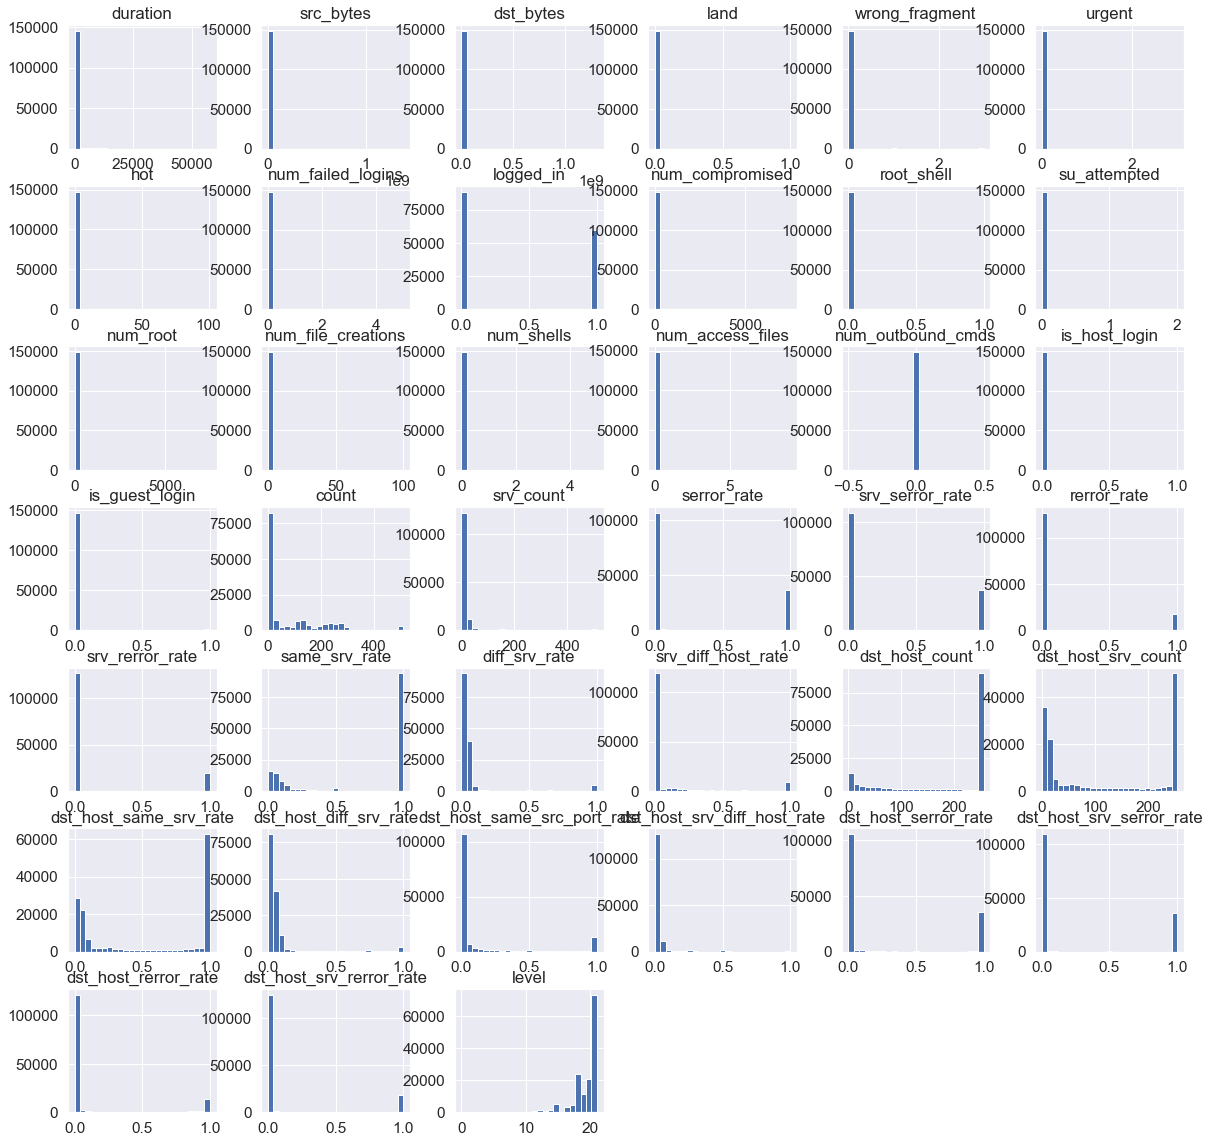

In [57]:
df.hist(bins=25,figsize=(20,20))

In [58]:
attackn = []
for i in df.attack :
    if i == 'normal':
        attackn.append("normal")
    else:
        attackn.append("attack")
df['attack'] = attackn
print(df['attack'][:5])

0    normal
1    normal
2    attack
3    normal
4    normal
Name: attack, dtype: object


normal    77054
attack    71463
Name: attack, dtype: int64

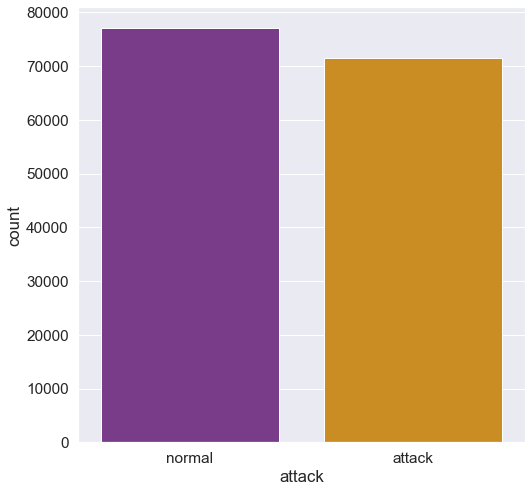

In [59]:
plt.figure(figsize=(8,8))
sns.countplot(df.attack , palette = 'CMRmap')
df['attack'].value_counts()

tcp     121569
udp      17614
icmp      9334
Name: protocol_type, dtype: int64

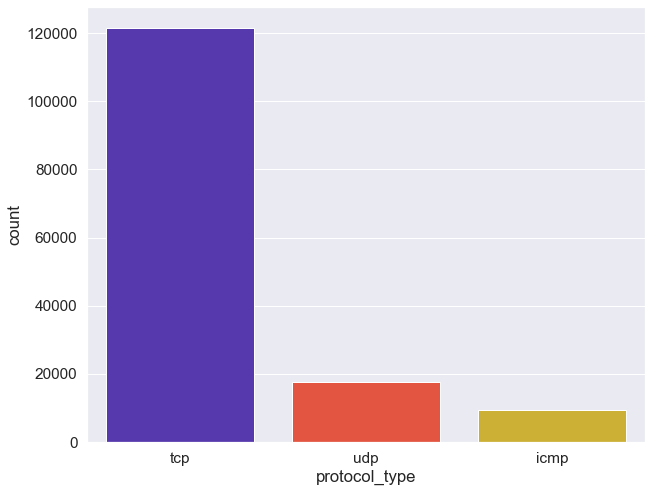

In [60]:
plt.figure(figsize=(10,8))
sns.countplot(df[ 'protocol_type'], palette ='CMRmap')
df['protocol_type'].value_counts()

<AxesSubplot:xlabel='protocol_type', ylabel='count'>

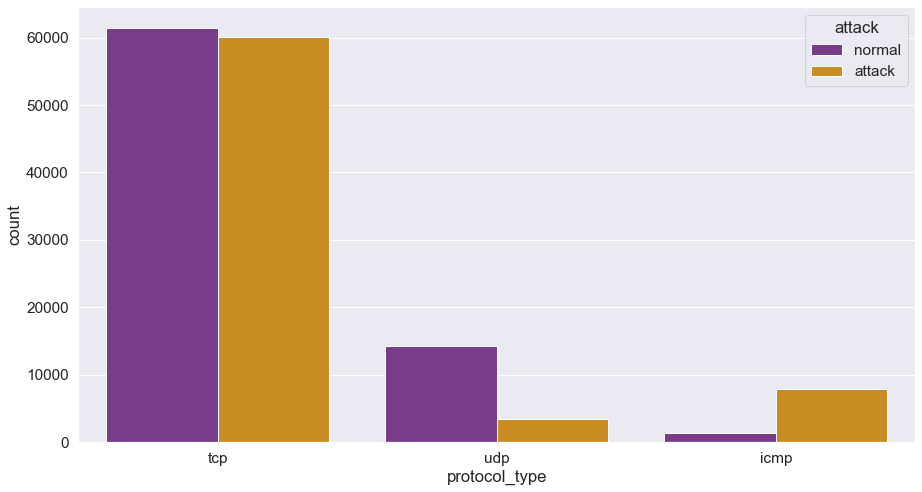

In [61]:
plt.figure(figsize=(15,8))
sns.countplot(x='protocol_type',hue='attack' , data = df , palette ='CMRmap')

<AxesSubplot:xlabel='count', ylabel='service'>

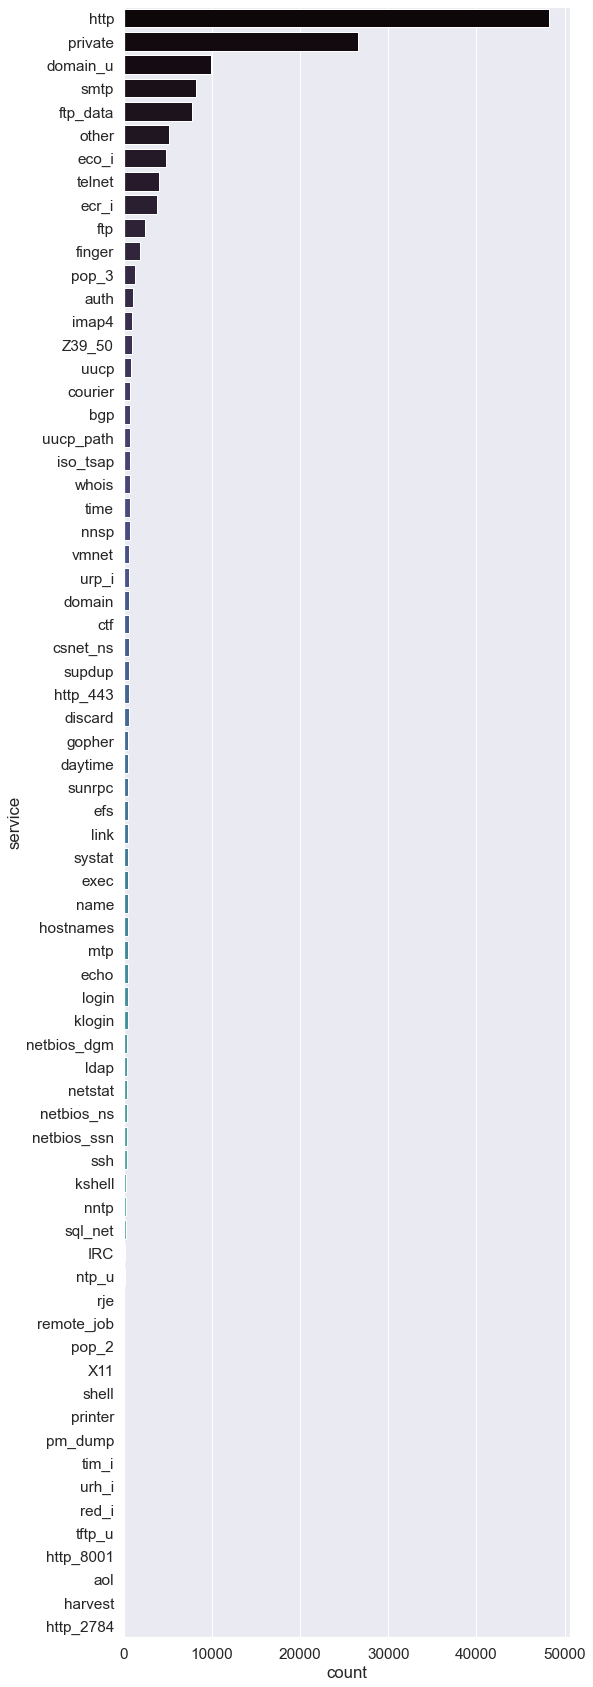

In [62]:
plt.figure(figsize=(8,30))
sns.countplot(palette='mako', y='service' , data=df, order = df['service'].value_counts().index)


SF        89820
S0        36864
REJ       15083
RSTR       3090
RSTO       2335
S1          386
SH          344
S3          298
S2          142
RSTOS0      105
OTH          50
Name: flag, dtype: int64


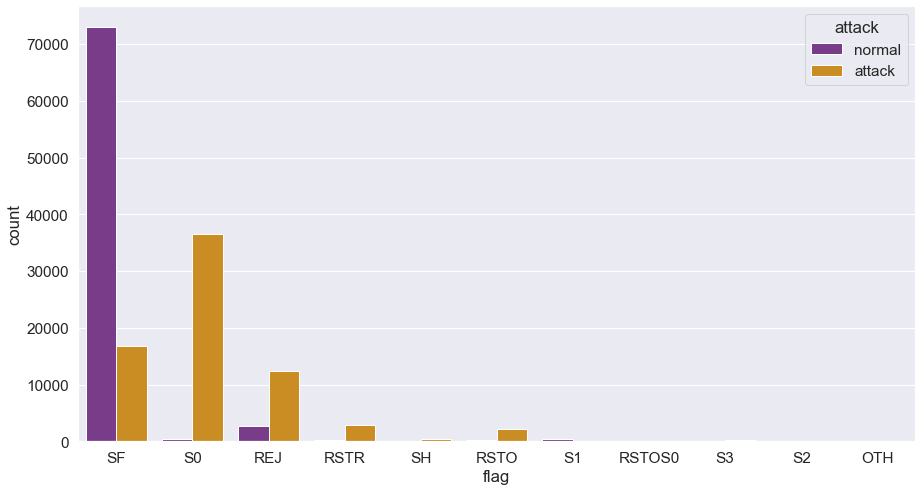

In [63]:
plt.figure(figsize=(15,8))
sns.countplot(x='flag',hue='attack' , data = df , palette ='CMRmap')
print(df.flag.value_counts())

In [64]:
#Befoer Encoder
df.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,attack,19


In [65]:
protocol_typele = LabelEncoder()
servicele = LabelEncoder()
flagle = LabelEncoder()

In [66]:
attackle = LabelEncoder()
df['attack'] = attackle.fit_transform(df['attack'])

In [67]:
df['protocol_type'] = attackle.fit_transform(df['protocol_type'])
df['service'] = attackle.fit_transform(df['service'])
df['flag'] = attackle.fit_transform(df['flag'])


In [68]:
df.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,1,20,9,491,0,0,0,0,0,...,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,1,20
1,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,1,15
2,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,0,19


<AxesSubplot:>

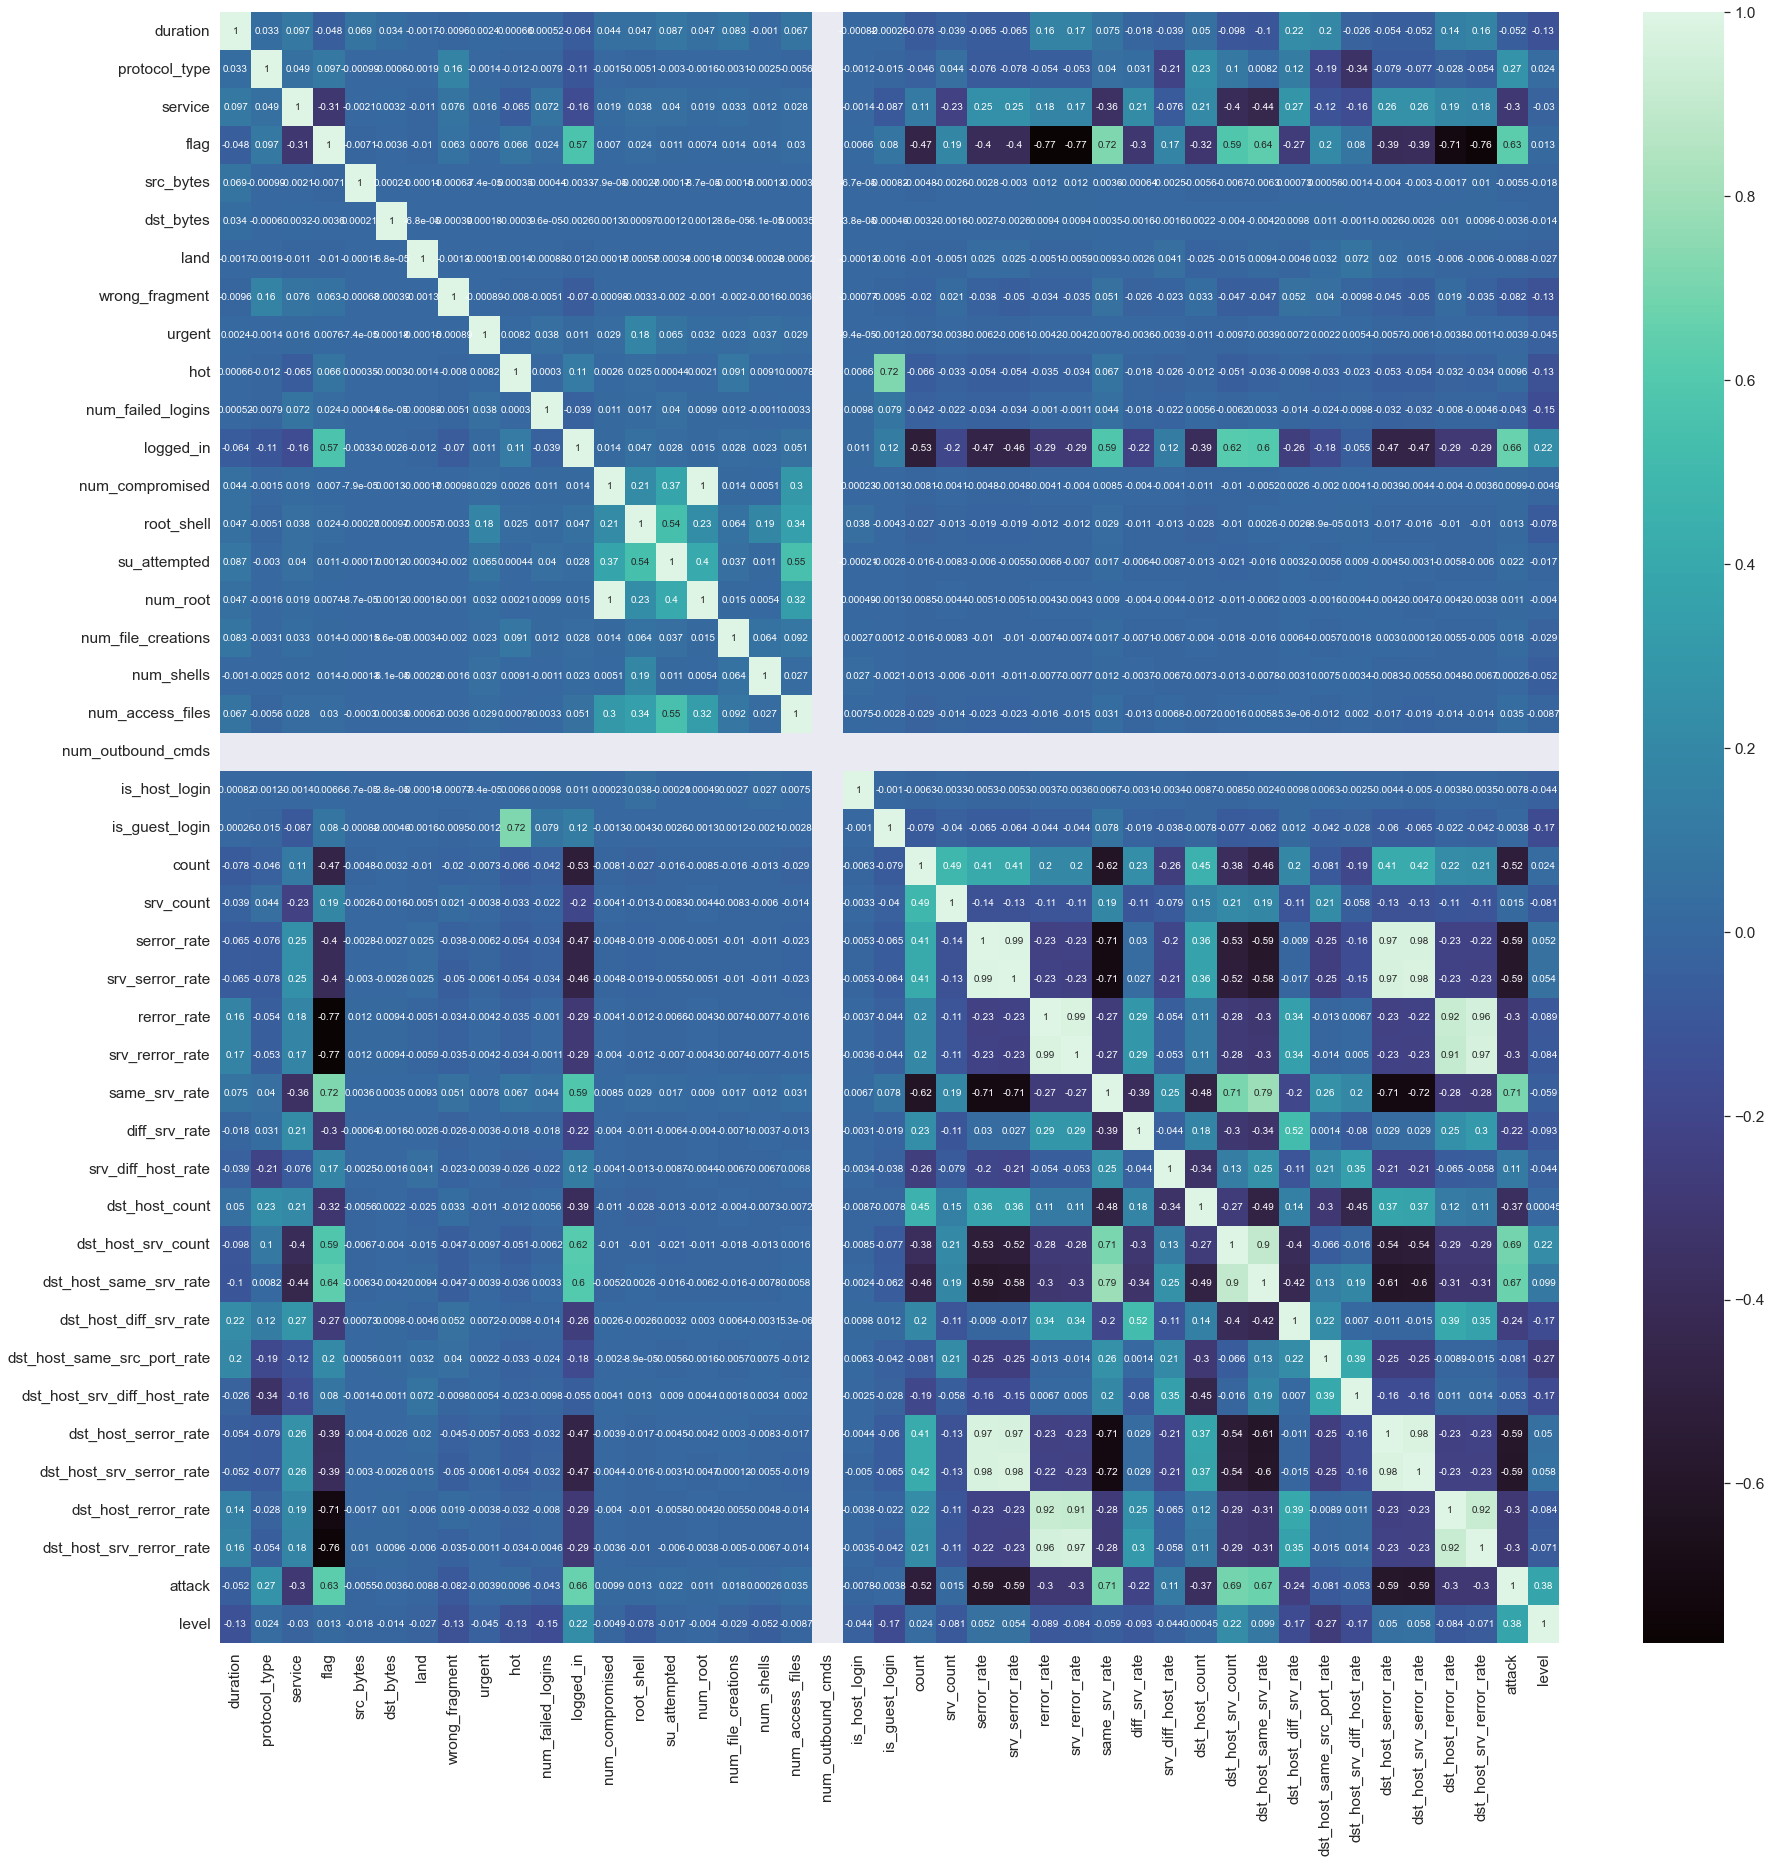

In [69]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot= True,cmap='mako')

In [70]:
# Assuming df is your DataFrame and 'attack' is your target variable
x = df.drop('attack', axis=1)
y = df['attack']

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(f'Training Shape x:',X_train.shape)
print(f'Testing Shape x:',X_test.shape)
print('*****___________*****___________*****')
print(f'Training Shape y:',y_train.shape)
print(f'Testing Shape y:',y_test.shape)

Training Shape x: (103961, 42)
Testing Shape x: (44556, 42)
*****___________*****___________*****
Training Shape y: (103961,)
Testing Shape y: (44556,)
